In [28]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt5
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [271]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.optimize import curve_fit


from qick import *
from qick.helpers import gauss

import h5py

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
import scipy as sp
import json
from scipy.fft import fft, fftfreq
import Pyro4.util

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict

In [2]:
sys.path.append(os.getcwd()+'/../../qutip_sims')
from QSwitch import QSwitch
from PulseSequence import PulseSequence
import experiments as meas
from TomoAnalysis import TomoAnalysis
tomo_analysis = TomoAnalysis(nb_qubits=3)
import qutip as qt
import matplotlib.style as style
style.use('S:\Connie\prx.mplstyle')

imported experiments.clifford_averager_program
imported experiments.fitting
imported experiments.four_qubit.fourQ_state_tomo
imported experiments.qram_protocol_timestepped
imported experiments.single_qubit.acstarkshift_spectroscopy
imported experiments.single_qubit.amplitude_rabi
imported experiments.single_qubit.length_rabi
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.rfsoc_tof_calibration
imported experiments.single_qubit.single_shot
imported experiments.single_qubit.t1
imported experiments.single_qubit.t2_ramsey
imported experiments.three_qubit.threeQ_state_tomo
imported experiments.two_qubit.amplitude_rabi_EgGf
imported experiments.two_qubit.amplitude_rabi_f0g1
imported experiments.two_qubit.amprabi_opt_ctrl_state_prep
imported experiments.two_qubit.crosstalk_echo_calib
imported experiments.two_qubit.length_rabi_EgGf
imported experiments.two_qubit.length_rabi_F0G1
imported exper

In [3]:
"""Reopen saved data"""
def prev_data(expt_path, filename=None):
    temp_data_file = expt_path
    if filename is not None: temp_data_file = os.path.join(expt_path, filename)
    print(temp_data_file)
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

In [5]:
# config_file = 'config_zcu216.yml'
# config_file = 'config_q3diamond.yml'
config_file = 'config_q3diamond_full688and638_reset.yml'
config_path = os.path.join('s:\\Connie\\experiments\\qram_tprocv1_expts\\configs\\', config_file)
print('Config will be', config_path)

Config will be s:\Connie\experiments\qram_tprocv1_expts\configs\config_q3diamond_full688and638_reset.yml


# Save paths

In [162]:
save_plot_path = 'S:\\QRAM\\qram_4QR2\\plots\\paper'

# Swap length rabi

In [294]:
data_dir = 'S:\QRAM\qram_4QR2\data'

In [295]:
filename_q1q3_right = '00071_length_rabi_EgGf_qubit31.h5'
filename_q1q3_wrong = '00072_length_rabi_EgGf_qubit31.h5'
filename_q1q2_right = '00070_length_rabi_EgGf_qubit21.h5'
filename_q1q2_wrong = '00071_length_rabi_EgGf_qubit21.h5'

folder = 'data_250119'

files = []

for f in [filename_q1q3_right, filename_q1q3_wrong, filename_q1q2_right, filename_q1q2_wrong]:
    file = h5py.File(data_dir + '/' + folder + '/' + f, 'r')
    files.append(file)

In [296]:
t13_right = 2*np.asarray(files[0]['xpts']) # multiply by 2 to get the pi length
t13_wrong = 2*np.asarray(files[1]['xpts'])
t12_right = 2*np.asarray(files[2]['xpts'])
t12_wrong = 2*np.asarray(files[3]['xpts'])

# amp_13_right = np.asarray(files[0]['avgi'])
# amp_13_wrong = np.asarray(files[1]['avgi'])
amp_13_right = np.asarray(files[0]['amps'])
amp_13_wrong = np.asarray(files[1]['amps'])

amp_12_right = np.asarray(files[2]['avgi'])
amp_12_wrong = np.asarray(files[3]['avgi'])

# amp_13_right = np.abs(np.asarray(files[0]['avgi']) + 1j*np.asarray(files[0]['avgq']))
# amp_13_wrong = np.abs(np.asarray(files[1]['avgi']) + 1j*np.asarray(files[1]['avgq']))
# amp_12_right = np.abs(np.asarray(files[2]['avgi']) + 1j*np.asarray(files[2]['avgq']))
# amp_12_wrong = np.abs(np.asarray(files[3]['avgi']) + 1j*np.asarray(files[3]['avgq']))

 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\3192873655.py: 1DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\3192873655.py: 2DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\3192873655.py: 3DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\3192873655.py: 4DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\3192873655.py: 8DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_2

25011900071_25011900072_25011900070_25011900071__length_rabi_EgGf
Saving S:\QRAM\qram_4QR2\plots\paper\rabi_eg_gf_25011900071_25011900072_25011900070_25011900071__length_rabi_EgGf.pdf
Saving S:\QRAM\qram_4QR2\plots\paper\rabi_eg_gf_25011900071_25011900072_25011900070_25011900071__length_rabi_EgGf.svg


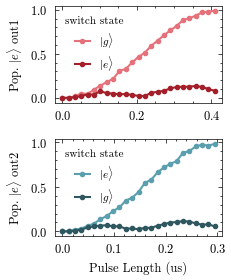

In [297]:
color_dict = {'q1q3_right': '#5b9faeff', 'q1q3_wrong': '#2f5760ff', 'q1q2_right': '#e5717aff', 'q1q2_wrong': '#a31f29ff'}

fig, ax = plt.subplots(2, 1, figsize=(2.5, 3))


y3_right = amp_13_right[0]
y3_wrong = amp_13_wrong[0]

y13_1_scaled = (y3_right - y3_right[0])/(np.max(y3_right) - np.min(y3_right))
# y13_2_scaled = (y2 - np.min(y3_right))/(np.max(y3_right) - np.min(y3_right)) 
y13_2_scaled = (y3_wrong - y3_wrong[0])/(np.max(y3_right) - np.min(y3_right)) 

# y13_1_scaled = y 
# y13_2_scaled = y2


y2_right = amp_12_right[0]
y2_wrong = amp_12_wrong[0]

y12_1_scaled = (y2_right - y2_right[0])/(np.max(y2_right) - np.min(y2_right))
# y12_2_scaled = (y2 - np.min(y2_right))/(np.max(y2_right) - np.min(y2_right))
y12_2_scaled = (y2_wrong - y2_wrong[0])/(np.max(y2_right) - np.min(y2_right))

# y12_1_scaled = y 
# y12_2_scaled = y2


# fit both with a sine function

# def fit_sin(x, A, B, C, D):
#     return A*np.sin(B*x + C) + D

# popt1, pcov1 = opt.curve_fit(fit_sin, t13_right, y13_1_scaled, p0=[0.5, 2*np.pi/0.5, np.pi/2, 0.5], maxfev=10000)
# popt2, pcov2 = opt.curve_fit(fit_sin, t13_wrong, y13_2_scaled, p0=[0.05, 2*np.pi/4, np.pi/2, 0.01], maxfev=10000)
# popt3, pcov3 = opt.curve_fit(fit_sin, t12_right, y12_1_scaled, p0=[0.5, 2*np.pi/0.5, np.pi/2, 0.5], maxfev=10000)
# popt4, pcov4 = opt.curve_fit(fit_sin, t12_wrong, y12_2_scaled, p0=[0.05, 2*np.pi/4, np.pi/2, 0.01], maxfev=10000)

# y13_1_fit = fit_sin(t13_right, *popt1)
# y13_2_fit = fit_sin(t13_wrong, *popt2)
# y12_1_fit = fit_sin(t12_right, *popt3)
# y12_2_fit = fit_sin(t12_wrong, *popt4)

# idx_stop_12 = -1
# idx_stop_13 = -1
idx_stop_12 = np.argmax(y12_1_scaled)# + 2
idx_stop_13 = np.argmax(y13_1_scaled)# + 2

ax[1].plot(t13_right[:idx_stop_13], y13_1_scaled[:idx_stop_13], 'o-', label=r'$|e\rangle$', color=color_dict['q1q3_right'])
ax[1].plot(t13_wrong[:idx_stop_13], y13_2_scaled[:idx_stop_13], 'o-', label=r'$|g\rangle$', color=color_dict['q1q3_wrong'])
# ax[1].plot(t13_right[:idx_stop_13], y13_1_fit[:idx_stop_13], color=color_dict['q1q3_right'])
# ax[1].plot(t13_wrong[:idx_stop_13], y13_2_fit[:idx_stop_13], color=color_dict['q1q3_wrong'])
# set subtitle
# ax[1].set_title('input - output 2')

ax[0].plot(t12_right[:idx_stop_12], y12_1_scaled[:idx_stop_12], 'o-', label=r'$|g\rangle$', color=color_dict['q1q2_right'])
ax[0].plot(t12_wrong[:idx_stop_12], y12_2_scaled[:idx_stop_12], 'o-', label=r'$|e\rangle$', color=color_dict['q1q2_wrong'])
# ax[0].plot(t12_right[:idx_stop_12], y12_1_fit[:idx_stop_12], color=color_dict['q1q2_right'])
# ax[0].plot(t12_wrong[:idx_stop_12], y12_2_fit[:idx_stop_12], color=color_dict['q1q2_wrong'])
# set subtitle
# ax[0].set_title('input - output 1')

ax[0].set_ylabel(r'Pop. $|e\rangle$ out1')
ax[1].set_ylabel(r'Pop. $|e\rangle$ out2')

ax[1].set_xlabel('Pulse Length (us)')

ax[0].legend(title='switch state', frameon=False)
ax[1].legend(title='switch state', frameon=False)

fig.tight_layout()

filenames = [filename_q1q3_right, filename_q1q3_wrong, filename_q1q2_right, filename_q1q2_wrong]

filepaths_str = '_'.join([folder[5:] + filename[:5] for filename in filenames]) + '_'+filenames[0][5:-11]

print(filepaths_str)

savename = os.path.join(save_plot_path, f'rabi_eg_gf_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'rabi_eg_gf_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)

# Chevron right / wrong state

In [298]:
chevron_filename_q1q3_right = '00000_rabi_EgGf_freqlen_chevron_qubit31.h5'
chevron_filename_q1q3_wrong = '00001_rabi_EgGf_freqlen_chevron_qubit31.h5'
chevron_filename_q1q2_right = '00000_rabi_EgGf_freqlen_chevron_qubit21.h5'
chevron_filename_q1q2_wrong = '00001_rabi_EgGf_freqlen_chevron_qubit21.h5'


folder = 'data_250119'

files = []

for f in [chevron_filename_q1q3_right, chevron_filename_q1q3_wrong, chevron_filename_q1q2_right, chevron_filename_q1q2_wrong]:
    file = h5py.File(data_dir + '/' + folder + '/' + f, 'r')
    files.append(file)

In [299]:
qb_plot = 0
data_13 = 'amps'
data_12 = 'avgi'

amp_13_right = np.asarray(files[0][data_13])
amp_13_wrong = np.asarray(files[1][data_13])
amp_12_right = np.asarray(files[2][data_12])
amp_12_wrong = np.asarray(files[3][data_12])

freqs_13_right = np.asarray(files[0]['freqpts'])
freqs_13_wrong = np.asarray(files[1]['freqpts'])
freqs_12_right = np.asarray(files[2]['freqpts'])
freqs_12_wrong = np.asarray(files[3]['freqpts'])

t13_right = np.asarray(files[0]['lenpts'])*2*1e-3
t13_wrong = np.asarray(files[1]['lenpts'])*2*1e-3
t12_right = np.asarray(files[2]['lenpts'])*2*1e-3
t12_wrong = np.asarray(files[3]['lenpts'])*2*1e-3




 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1392855038.py: 5DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1392855038.py: 6DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1392855038.py: 7DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1392855038.py: 8DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1392855038.py: 10DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
 C:\Users\slab\AppData\Local\Temp\ipykernel_

In [300]:
import matplotlib as mpl

Saving S:\QRAM\qram_4QR2\plots\paper\chevron_25011900000_25011900001__rabi_EgGf_freqlen_chevron_13.pdf
Saving S:\QRAM\qram_4QR2\plots\paper\chevron_25011900000_25011900001__rabi_EgGf_freqlen_chevron_12.pdf
Saving S:\QRAM\qram_4QR2\plots\paper\chevron_25011900000_25011900001__rabi_EgGf_freqlen_chevron_13.svg


 C:\Users\slab\AppData\Roaming\Python\Python39\site-packages\matplotlib\ticker.py: 2937

Saving S:\QRAM\qram_4QR2\plots\paper\chevron_25011900000_25011900001__rabi_EgGf_freqlen_chevron_12.svg


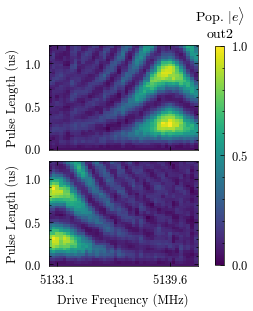

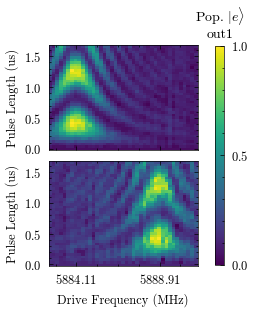

In [315]:
# fig, axes = plt.subplots(gridspec_kw={'height_ratios': [3, 1], 'width_ratios':[1, 0.05]}, figsize=(2.5, 3))

fig, ax = plt.subplots(2, 1, figsize=(2.5*0.85, 3*0.95), sharex=True)
fig.subplots_adjust(hspace=0.1)

f_right_13 = 5139.60
f_wrong_13 = f_right_13 - 6.5

f_right_12 = 5884.11
f_wrong_12 = f_right_12 + 4.8

y_12_right = -amp_12_right[qb_plot].T ## minus sign to match the amplitude of the other qubit
y_12_wrong = -amp_12_wrong[qb_plot].T

y_12_right_scaled = (y_12_right - y_12_right[0])/(np.max(y_12_right) - np.min(y_12_right))
y_12_wrong_scaled = (y_12_wrong - y_12_wrong[0])/(np.max(y_12_right) - np.min(y_12_right))

y_13_right = amp_13_right[qb_plot].T
y_13_wrong = amp_13_wrong[qb_plot].T 
y_13_right_scaled = (y_13_right - y_13_right[0])/(np.max(y_13_right) - np.min(y_13_right))
y_13_wrong_scaled = (y_13_wrong - y_13_wrong[0])/(np.max(y_13_right) - np.min(y_13_right))


x_12_right = freqs_12_right # - f_right_12
x_12_wrong = freqs_12_wrong # - f_right_12

x_13_right = freqs_13_right # - f_right_13
x_13_wrong = freqs_13_wrong # - f_right_13


ax[0].pcolor(x_13_right, t13_right*1e3,y_13_right_scaled, cmap='viridis')
ax[1].pcolor(x_13_wrong, t13_wrong*1e3, y_13_wrong_scaled, cmap='viridis')

ax[1].set_ylabel('Pulse Length (us)')
ax[0].set_ylabel('Pulse Length (us)')
ax[1].set_xticks([f_right_13, f_wrong_13])


# add a colorbar

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='viridis'), ax=ax, location='right', aspect=25, ticks=[0, 0.5, 1], fraction=0.05, pad=0.1)
cbar.ax.set_title(r'Pop. $|e\rangle$' + '\nout2', fontsize=10)

# put the colorbar closer to the figurer

cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')

# ax[1].set_xlabel('$f - f_\mathrm{eg-gf}^\mathrm{in-out2}$ (MHz)')
ax[1].set_xlabel('Drive Frequency (MHz)')



# fig.tight_layout()


fig2, ax2 = plt.subplots(2, 1, figsize=(2.5*0.85, 3*0.95), sharex=True)
fig2.subplots_adjust(hspace=0.1)


ax2[0].pcolor(x_12_right, t12_right*1e3, y_12_right_scaled, cmap='viridis')
ax2[1].pcolor(x_12_wrong, t12_wrong*1e3, y_12_wrong_scaled, cmap='viridis')

# ax2[1].set_xlabel('$f - f_\mathrm{eg-gf}^\mathrm{in-out1}$ (MHz)')
ax2[1].set_xlabel('Drive Frequency (MHz)')
ax2[1].set_ylabel('Pulse Length (us)')
ax2[0].set_ylabel('Pulse Length (us)')
ax2[1].set_xticks([f_right_12, f_wrong_12])



cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='viridis'), ax=ax2, location='right', aspect=25, ticks=[0, 0.5, 1], fraction=0.05, pad=0.1)
cbar.ax.set_title(r'Pop. $|e\rangle$' + '\nout1', fontsize=10)


for filetype in ['pdf', 'svg']:
    filenames = [chevron_filename_q1q3_right, chevron_filename_q1q3_wrong]
    filepaths_str = '_'.join([folder[5:] + filename[:5] for filename in filenames]) + '_'+filenames[0][5:-11]

    savename = os.path.join(save_plot_path, f'chevron_{filepaths_str}_13.{filetype}')
    print("Saving", savename)
    fig.savefig(savename)


    filenames = [chevron_filename_q1q2_right, chevron_filename_q1q2_wrong]
    filepaths_str = '_'.join([folder[5:] + filename[:5] for filename in filenames]) + '_'+filenames[0][5:-11]

    savename = os.path.join(save_plot_path, f'chevron_{filepaths_str}_12.{filetype}')
    print("Saving", savename)
    fig2.savefig(savename)

# Swap pi/-pi

In [150]:
data_path = 'S:\\QRAM\\qram_4QR2\\'
folder = 'data_250119'
expt_path = os.path.join(data_path, 'data', folder)
print('Data dir', expt_path)

Data dir S:\QRAM\qram_4QR2\data\data_250119


In [199]:
pmp_path = "00072_PiMinusPiEgGfExptQ31"

S:\QRAM\qram_4QR2\data\data_250119\00072_PiMinusPiEgGfExptQ31.h5
Extracted data and attrs ['config']
dict_keys(['amps', 'angles', 'avgi', 'avgq', 'best_freq', 'counts_calib', 'cycle_sweep', 'fit_q1_amps', 'fit_q1_err_amps', 'fit_q3_amps', 'fit_q3_err_amps', 'freq_sweep', 'ge_avgs', 'phases', 'products', 'thresholds', 'xpts'])
Fit best freq (Q3) 5139.587865321054 which is 7.201071570465501 away from old freq 5132.386793750588
Fit best freq (Q1) 5139.593983690287 which is 7.207189939698765 away from old freq 5132.386793750588
best 0 0.062336200801551625
Best freq fitted 5139.587865321054


 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1939458940.py: 13

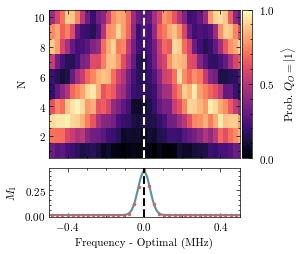

25011900072_PiMinusPiEgGfExptQ31
Saving S:\QRAM\qram_4QR2\plots\paper\piminuspi_25011900072_PiMinusPiEgGfExptQ31.pdf
Saving S:\QRAM\qram_4QR2\plots\paper\piminuspi_25011900072_PiMinusPiEgGfExptQ31.svg


In [259]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

pmp = meas.PiMinusPiEgGfExperiment(config_file=config_path)
data, attrs = prev_data(os.path.join(expt_path, pmp_path+'.h5'))
print(data.keys())
pmp.cfg = AttrDict(attrs["config"])

data = pmp.analyze(data=data, fit=True)

qA, qB = pmp.cfg.expt.qubits

inner_sweep = data["freq_sweep"]
outer_sweep = data["cycle_sweep"]

y_sweep = outer_sweep
x_sweep = inner_sweep

prod_data = data["products"][0] * data["products"][1]
x_sweep_fit = np.linspace(x_sweep[0], x_sweep[-1], 300)
popt, pcov = meas.fitting.fit_gauss(x_sweep, prod_data)
fit_freq = popt[1]

x_sweep -= fit_freq
popt[1] -= fit_freq
x_sweep_fit -= fit_freq
fit_freq = 0

labelsize = 8
cmap = 'magma'

fig, axes = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 1], 'width_ratios':[1, 0.05]}, figsize=(3.0, 2.5))

axes[1,1].remove()

a0 = axes[0, 0]
plt.sca(a0)
a0.set_ylabel(f"N", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelbottom=False, labelsize=labelsize, pad=2)
data_name = "amps"
plot_data = data[data_name][0] # 0 for qDrive, 1 for q1
scaled_e = np.max(plot_data)
scaled_g = np.min(plot_data)
scale_ge = scaled_e - scaled_g
plot_data = (plot_data - scaled_g) / scale_ge
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap=cmap, shading="auto")
plt.axvline(fit_freq, color="w", linestyle="--")

acbar = axes[0, 1]
# plt.sca(acbar)
cbar = plt.colorbar(cax=acbar, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label('Prob. $Q_O=|1\\rangle$', size='small')

a1 = axes[1, 0]
a1.sharex(a0)
plt.sca(a1)
a1.set_ylabel("$M_1$", fontsize=labelsize)
a1.set_xlabel("Frequency - Optimal (MHz)", fontsize=labelsize)
a1.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.plot(x_sweep_fit, meas.fitting.gaussian(x_sweep_fit, *popt))
plt.plot(x_sweep, prod_data, ".")
plt.axvline(fit_freq, color="k", linestyle="--")
# plt.ylim([-0.05, 0.6])
plt.xlim([-0.5, 0.5])
a1.set_xticks([-0.4, 0, 0.4])

plt.tight_layout(pad=0.2)
plt.show()


filepaths_str = folder[5:] + pmp_path

print(filepaths_str)

savename = os.path.join(save_plot_path, f'piminuspi_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'piminuspi_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)
    

In [201]:
pmp_sweep_path = "00006_eggf_piminuspi_gain_sweep_Q31"

S:\QRAM\qram_4QR2\data\data_250119\00006_eggf_piminuspi_gain_sweep_Q31.h5
Extracted data and attrs ['config']
dict_keys(['amps', 'avgi', 'avgq', 'cycle_sweep', 'freq_sweep', 'gain_sweep', 'products'])


 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1939458940.py: 13

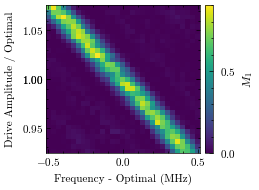

25011900006_eggf_piminuspi_gain_sweep_Q31
Saving S:\QRAM\qram_4QR2\plots\paper\piminuspi_sweep_25011900006_eggf_piminuspi_gain_sweep_Q31.pdf
Saving S:\QRAM\qram_4QR2\plots\paper\piminuspi_sweep_25011900006_eggf_piminuspi_gain_sweep_Q31.svg


In [260]:
pmp_sweep = meas.Experiment(config_file=config_path)
data, attrs = prev_data(os.path.join(expt_path, pmp_sweep_path+'.h5'))
pmp_sweep.data = data
print(data.keys())
cfg = AttrDict(attrs["config"])

qA, qB = pmp_sweep_path[-2:]
qA = int(qA)
qB = int(qB)
opt_gain = cfg.device.qubit.pulses.pi_EgGf_Q.half_gain[qA]
opt_freq = cfg.device.qubit.f_EgGf_Q_half[qA]

cycle_sweep = data["cycle_sweep"]
label = "($X_{\pi}, X_{-\pi})^N$"
# label = "($X_{\pi/2}, X_{\pi/2}, X_{-\pi/2}, X_{-\pi/2})^N$"

inner_sweep = data["freq_sweep"]
outer_sweep = data["gain_sweep"]

y_sweep = outer_sweep
x_sweep = inner_sweep

x_sweep -= opt_freq
y_sweep /= opt_gain

labelsize = 8

fig = plt.figure(figsize=(2.5, 1.8))
data_name = "products"
plot_data = data[data_name][0] * data[data_name][1]

a0 = plt.subplot(111)
a0.set_ylabel(f"Drive Amplitude / Optimal", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
plt.xlabel("Frequency - Optimal (MHz)", fontsize=labelsize)
a0.set_xticks([-0.5, 0, 0.5])
ymin = np.min(y_sweep)
ymax = np.max(y_sweep)
ytick_spacing = 0.05
ytick_labels = np.round(np.linspace(ymin, ymax, int(np.ceil((ymax-ymin)/ytick_spacing))+1) /ytick_spacing) * ytick_spacing
a0.set_yticks(ytick_labels)

divider = make_axes_locatable(a0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label("$M_1$", size='small')

plt.tight_layout(pad=0.0)
plt.show()

filepaths_str = folder[5:] + pmp_sweep_path

print(filepaths_str)

savename = os.path.join(save_plot_path, f'piminuspi_sweep_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'piminuspi_sweep_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)
    
    

# Swap pi train

In [217]:
pp_path = "00071_eggf_train_Q31"

S:\QRAM\qram_4QR2\data\data_250119\00071_eggf_train_Q31.h5
Extracted data and attrs ['config']
dict_keys(['amps', 'angles', 'avgi', 'avgq', 'best_gain', 'counts_calib', 'cycle_sweep', 'fit_q1_avgi', 'fit_q1_err_avgi', 'fit_q3_avgi', 'fit_q3_err_avgi', 'gain_sweep', 'ge_avgs', 'products', 'thresholds'])
6679.170094901057


 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1939458940.py: 13

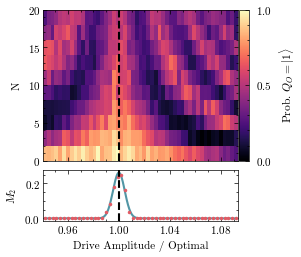

25011900071_eggf_train_Q31
Saving S:\QRAM\qram_4QR2\plots\paper\pipi_25011900071_eggf_train_Q31.pdf
Saving S:\QRAM\qram_4QR2\plots\paper\pipi_25011900071_eggf_train_Q31.svg


In [ ]:
pp = meas.PiTrainEgGfGainSweepExperiment(config_file=config_path)
data, attrs = prev_data(os.path.join(expt_path, pp_path+'.h5'))
print(data.keys())
pp.cfg = AttrDict(attrs["config"])

# pp.analyze(data=data, fit=True)

qA, qB = pp.cfg.expt.qubits

inner_sweep = data["gain_sweep"]
outer_sweep = data["cycle_sweep"]

y_sweep = outer_sweep
x_sweep = inner_sweep

prod_data = data["products"][0] * data["products"][1]
x_sweep_fit = np.linspace(x_sweep[0], x_sweep[-1], 300)
popt, pcov = meas.fitting.fit_gauss(x_sweep, prod_data)
fit_gain = popt[1]
print(fit_gain)

x_sweep /= fit_gain
popt, pcov = meas.fitting.fit_gauss(x_sweep, prod_data)
x_sweep_fit = np.linspace(x_sweep[0], x_sweep[-1], 300)
fit_gain = 1

labelsize = 8
cmap = 'magma'

fig, axes = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 1], 'width_ratios':[1, 0.05]}, figsize=(3.0, 2.5))

axes[1,1].remove()

a0 = axes[0, 0]
plt.sca(a0)
a0.set_ylabel(f"N", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelbottom=False, labelsize=labelsize, pad=2)
data_name = "amps"
plot_data = data[data_name][0] # 0 for qDrive, 1 for q1
scaled_e = np.max(plot_data)
scaled_g = np.min(plot_data)
scale_ge = scaled_e - scaled_g
plot_data = (plot_data - scaled_g) / scale_ge
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap=cmap, shading="auto")
plt.axvline(fit_gain, color="k", linestyle="--")

acbar = axes[0, 1]
# plt.sca(acbar)
cbar = plt.colorbar(cax=acbar, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label('Prob. $Q_O=|1\\rangle$', size='small')

a1 = axes[1, 0]
a1.sharex(a0)
plt.sca(a1)
a1.set_ylabel("$M_2$", fontsize=labelsize)
a1.set_xlabel("Drive Amplitude / Optimal", fontsize=labelsize)
a1.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.plot(x_sweep_fit, meas.fitting.gaussian(x_sweep_fit, *popt))
plt.plot(x_sweep, prod_data, ".")
plt.axvline(fit_gain, color="k", linestyle="--")
# plt.ylim([-0.05, 0.4])
a1.set_xticks([0.96, 1.0, 1.04, 1.08])

plt.tight_layout(pad=0.1)
plt.show()


filepaths_str = folder[5:] + pp_path

print(filepaths_str)

savename = os.path.join(save_plot_path, f'pipi_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'pipi_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)
    

In [203]:
pp_sweep_path = "00008_eggf_pipi_gain_sweep_Q31"

S:\QRAM\qram_4QR2\data\data_250119\00008_eggf_pipi_gain_sweep_Q31.h5
Extracted data and attrs ['config']
dict_keys(['amps', 'avgi', 'avgq', 'cycle_sweep', 'freq_sweep', 'gain_sweep', 'products'])


 C:\Users\slab\AppData\Local\Temp\ipykernel_27764\1939458940.py: 13

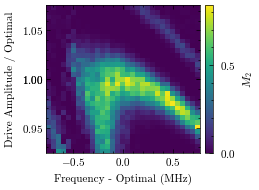

25011900008_eggf_pipi_gain_sweep_Q31
Saving S:\QRAM\qram_4QR2\plots\paper\pipi_sweep_25011900008_eggf_pipi_gain_sweep_Q31.pdf
Saving S:\QRAM\qram_4QR2\plots\paper\pipi_sweep_25011900008_eggf_pipi_gain_sweep_Q31.svg


In [269]:
pp_sweep = meas.Experiment(config_file=config_path)
data, attrs = prev_data(os.path.join(expt_path, pp_sweep_path+'.h5'))
pp_sweep.data = data
print(data.keys())
cfg = AttrDict(attrs["config"])

qA, qB = pp_sweep_path[-2:]
qA = int(qA)
qB = int(qB)
opt_gain = cfg.device.qubit.pulses.pi_EgGf_Q.half_gain[qA]
opt_freq = cfg.device.qubit.f_EgGf_Q_half[qA]

cycle_sweep = data["cycle_sweep"]
label = "($X_{\pi}, X_{-\pi})^N$"
# label = "($X_{\pi/2}, X_{\pi/2}, X_{-\pi/2}, X_{-\pi/2})^N$"

inner_sweep = data["freq_sweep"]
outer_sweep = data["gain_sweep"]

y_sweep = outer_sweep
x_sweep = inner_sweep

x_sweep -= opt_freq
y_sweep /= opt_gain

labelsize = 8

fig = plt.figure(figsize=(2.5, 1.8))
data_name = "products"
plot_data = data[data_name][0] * data[data_name][1]

a0 = plt.subplot(111)
a0.set_ylabel(f"Drive Amplitude / Optimal", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
plt.xlabel("Frequency - Optimal (MHz)", fontsize=labelsize)
a0.set_xticks([-0.5, 0, 0.5])
ymin = np.min(y_sweep)
ymax = np.max(y_sweep)
ytick_spacing = 0.05
ytick_labels = np.round(np.linspace(ymin, ymax, int(np.ceil((ymax-ymin)/ytick_spacing))+1) /ytick_spacing) * ytick_spacing
a0.set_yticks(ytick_labels)

divider = make_axes_locatable(a0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label("$M_2$", size='small')

plt.tight_layout(pad=0.0)
plt.show()

filepaths_str = folder[5:] + pp_sweep_path

print(filepaths_str)

savename = os.path.join(save_plot_path, f'pipi_sweep_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'pipi_sweep_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)
    
    

# Product of pi/-pi and pi/pi

In [250]:
def calculate_gain_freq_tuples(qubits, pipi_data, piminuspi_data, opt_len, interpolate=True, plot=True, test_pi_half=True):
    if interpolate:
        pipi_freq_sweep, pipi_gain_sweep = pipi_data["freq_sweep"], pipi_data["gain_sweep"]
        piminuspi_freq_sweep, piminuspi_gain_sweep = piminuspi_data["freq_sweep"], piminuspi_data["gain_sweep"]
        reduced_freq_sweep = np.linspace(np.max([pipi_freq_sweep[0], piminuspi_freq_sweep[0]]), np.min([pipi_freq_sweep[-1], piminuspi_freq_sweep[-1]]), 20)
        reduced_gain_sweep = np.linspace(np.max([pipi_gain_sweep[0], piminuspi_gain_sweep[0]]), np.min([pipi_gain_sweep[-1], piminuspi_gain_sweep[-1]]), 25)
        reduced_y = reduced_gain_sweep
        reduced_x = reduced_freq_sweep
        
        print("reduced gain range", reduced_gain_sweep[0], "to", reduced_gain_sweep[-1])
        print("reduced freq range", reduced_freq_sweep[0], "to", reduced_freq_sweep[-1])

        fine_pipi_data = np.zeros((2, len(reduced_y), len(reduced_x)))
        fine_piminuspi_data = np.zeros((2, len(reduced_y), len(reduced_x)))
        for iq in range (2):
            y, x = pipi_gain_sweep, pipi_freq_sweep
            pipi_interp = sp.interpolate.RegularGridInterpolator((y, x), pipi_data["products"][iq], bounds_error=False, fill_value=0)

            y, x = piminuspi_gain_sweep, piminuspi_freq_sweep
            piminuspi_interp = sp.interpolate.RegularGridInterpolator((y, x), piminuspi_data["products"][iq], bounds_error=False, fill_value=0)

            yg, xg = np.meshgrid(reduced_y, reduced_x, indexing='ij')
            fine_pipi_data[iq] = pipi_interp((yg, xg))
            fine_piminuspi_data[iq] = piminuspi_interp((yg, xg))

    else:
        assert np.all([pipi_data["freq_sweep"][i] == piminuspi_data["freq_sweep"][i] for i in range(len(pipi_data["freq_sweep"]))])
        assert np.all([pipi_data["gain_sweep"][i] == piminuspi_data["gain_sweep"][i] for i in range(len(pipi_data["gain_sweep"]))])
        assert len(pipi_data["freq_sweep"]) == len(piminuspi_data["freq_sweep"])
        assert len(pipi_data["gain_sweep"]) == len(piminuspi_data["gain_sweep"])
        fine_pipi_data = pipi_data["products"]
        fine_piminuspi_data = piminuspi_data["products"]
        reduced_x = pipi_data["freq_sweep"]
        reduced_y = pipi_data["gain_sweep"]

    x_sweep = reduced_x
    y_sweep = reduced_y

    prod_of_prods_data_q = np.array([fine_piminuspi_data[i] * fine_pipi_data[i] for i in range(2)])

    qA, qB = qubits

    # Interpolated pi pi data
    label_pipi = "($X_{\pi}, X_{\pi})^N$"
    if test_pi_half:
        label_pipi = "($X_{\pi/2}, X_{\pi/2})^{2N}$"
    title = (
        f"Interpolated Q{qA}/Q{qB} Product of Ns for {label_pipi}\n Len {opt_len:.3f}, Ns={pipi_data['cycle_sweep'].tolist()}"
    )

    if plot:
        plt.figure(figsize=(8, 9))
        plt.suptitle(title, fontsize=20)

        ax_qA = plt.subplot(211, title=f"QA ({qA})")
        ax_qA.set_ylabel(f"Gain", fontsize=18)
        ax_qA.tick_params(axis="both", which="major", labelsize=16)
        plot_data = fine_pipi_data[0]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        ax_qB = plt.subplot(212, title=f"QB ({qB})")
        ax_qB.set_ylabel(f"Gain", fontsize=18)
        ax_qB.set_xlabel("Frequency [MHz]", fontsize=18)
        ax_qB.tick_params(axis="both", which="major", labelsize=16)
        plot_data = fine_pipi_data[1]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        plt.tight_layout()
        plt.show()

        # Interpolated pi -pi data
        label_piminuspi = "($X_{\pi}, X_{-\pi})^N$"
        if test_pi_half:
            # label_piminuspi = "($X_{\pi/2}, X_{-\pi/2})^{N}$"
            label_piminuspi = "($X_{\pi/2}, X_{\pi/2}, X_{-\pi/2}, X_{-\pi/2})^N$"
        title = (
            f"Interpolated Q{qA}/Q{qB} Product of Ns for {label_piminuspi}\n Len {opt_len:.3f}, Ns={piminuspi_data['cycle_sweep'].tolist()}"
        )

        plt.figure(figsize=(8, 9))
        plt.suptitle(title, fontsize=20)

        ax_qA = plt.subplot(211, title=f"QA ({qA})")
        ax_qA.set_ylabel(f"Gain", fontsize=18)
        ax_qA.tick_params(axis="both", which="major", labelsize=16)
        plot_data = fine_piminuspi_data[0]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        ax_qB = plt.subplot(212, title=f"QB ({qB})")
        ax_qB.set_ylabel(f"Gain", fontsize=18)
        ax_qB.set_xlabel("Frequency [MHz]", fontsize=18)
        ax_qB.tick_params(axis="both", which="major", labelsize=16)
        plot_data = fine_piminuspi_data[1]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        plt.tight_layout()
        plt.show()

        # Product of the two inteprolated data sets
        title = (
            f"Interpolated Q{qA}/Q{qB} Product {label_piminuspi} $\\times$ {label_pipi}\n Len {opt_len:.3f}"
        )

        plt.figure(figsize=(8, 9))
        plt.suptitle(title, fontsize=20)

        ax_qA = plt.subplot(211, title=f"QA ({qA})")
        ax_qA.set_ylabel(f"Gain", fontsize=18)
        ax_qA.tick_params(axis="both", which="major", labelsize=16)
        plot_data = prod_of_prods_data_q[0]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)
    
        ax_qB = plt.subplot(212, title=f"QB ({qB})")
        ax_qB.set_ylabel(f"Gain", fontsize=18)
        ax_qB.set_xlabel("Frequency [MHz]", fontsize=18)
        ax_qB.tick_params(axis="both", which="major", labelsize=16)
        plot_data = prod_of_prods_data_q[1]
        plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18)

        plt.tight_layout()
        plt.show()

    return np.prod(prod_of_prods_data_q, axis=0), x_sweep, y_sweep

In [249]:
from skimage.feature import blob_dog, blob_log, blob_doh
from matplotlib.patches import Ellipse

def find_blobs(data_2d, x_sweep, y_sweep):
    data_2d = (np.copy(data_2d) - np.min(data_2d))/(np.max(data_2d) - np.min(data_2d))
    blobs_log = blob_log(data_2d, max_sigma=5, min_sigma=3, num_sigma=10, threshold=0.1, exclude_border=True)

    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(data_2d, max_sigma=5, min_sigma=3, threshold=0.1, exclude_border=True)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(data_2d, max_sigma=5, min_sigma=3, threshold=0.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)

    idxy = np.argmax(data_2d)
    i_ymax, i_xmax = np.unravel_index(idxy, data_2d.shape)
    x_max = x_sweep[i_xmax]
    y_max = y_sweep[i_ymax]

    fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        ax[idx].set_title(title)
        # ax[idx].imshow(data_2d)
        plt.sca(ax[idx])
        plt.pcolormesh(x_sweep, y_sweep, data_2d, cmap="viridis", shading="auto")
        for blob in blobs:
            r, c, sigma = blob
            opt_freq = x_sweep[int(c)]
            opt_gain = y_sweep[int(r)]
            sigma_x = sigma * (x_sweep[1] - x_sweep[0])
            sigma_y = sigma * (y_sweep[1] - y_sweep[0])
            c = Ellipse((opt_freq, opt_gain), width=sigma_x, height=sigma_y, color=color, linewidth=2, fill=False)
            ax[idx].add_patch(c)
        plt.plot(x_max, y_max, "o", markersize=8, markeredgecolor="r", markerfacecolor="None")
        plt.colorbar()
        # ax[idx].set_axis_off()

    plt.tight_layout()
    plt.show()

    # return blobs_list
    return blobs_log


reduced gain range 0.9321021184139054 to 1.073616018845701
reduced freq range -0.5 to 0.5


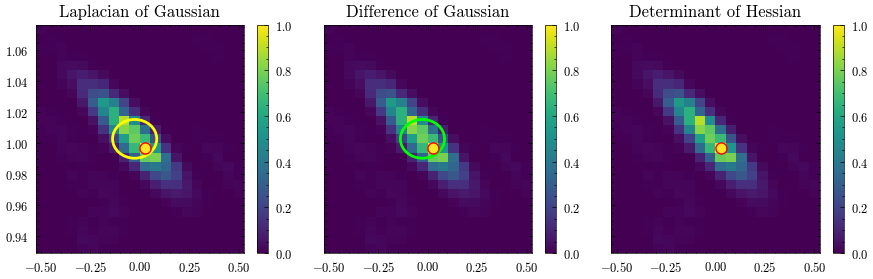

best freq from max 0.02631578947368418
best gain from max 0.9969626561118117
num blobs found 1
best freq from blob -0.026315789473684237
best gain from blob 1.0028590686298031


In [264]:
pipi_data = pp_sweep.data
piminuspi_data = pmp_sweep.data

prod_of_prods_data, x_sweep, y_sweep = calculate_gain_freq_tuples([qA, qB], pipi_data, piminuspi_data, opt_len=0, interpolate=True, plot=False)
blobs = find_blobs(prod_of_prods_data, x_sweep=x_sweep, y_sweep=y_sweep)

idxy = np.argmax(prod_of_prods_data)
ymax, xmax = np.unravel_index(idxy, prod_of_prods_data.shape)
pi_freq_max = x_sweep[xmax]
pi_gain_max = y_sweep[ymax]
print("best freq from max", pi_freq_max)
print("best gain from max", pi_gain_max)

print("num blobs found", len(blobs))
if len(blobs) > 0:
    r, c, sigma = blobs[0]
    pi_freq_blob = x_sweep[int(c)]
    pi_gain_blob = y_sweep[int(r)]
    sigma_x = sigma * (x_sweep[1] - x_sweep[0])
    sigma_y = sigma * (y_sweep[1] - y_sweep[0])
    print("best freq from blob", pi_freq_blob)
    print("best gain from blob", pi_gain_blob)

if len(blobs) == 0:
    print("WARNING: no blobs found!")
elif np.abs(pi_freq_max - pi_freq_blob) > 2*sigma_x or np.abs(pi_gain_max - pi_gain_blob) > 2*sigma_y:
    print('WARNING: max product location is not close to found blob center!')

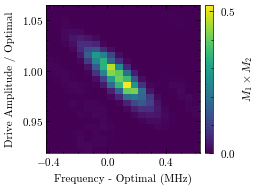

25011900008_eggf_pipi_gain_sweep_Q31
Saving S:\QRAM\qram_4QR2\plots\paper\ppXpmp_sweep_25011900008_eggf_pipi_gain_sweep_Q31.pdf
Saving S:\QRAM\qram_4QR2\plots\paper\ppXpmp_sweep_25011900008_eggf_pipi_gain_sweep_Q31.svg


In [268]:
opt_freq = pi_freq_blob
opt_gain = pi_gain_blob
# opt_freq = pi_freq_max
# opt_gain = pi_gain_max

x_sweep -= opt_freq
y_sweep /= opt_gain

labelsize = 8

fig = plt.figure(figsize=(2.5, 1.8))
plot_data = prod_of_prods_data

a0 = plt.subplot(111)
a0.set_ylabel(f"Drive Amplitude / Optimal", fontsize=labelsize)
a0.tick_params(axis="both", which="major", labelsize=labelsize, pad=2)
plt.pcolormesh(x_sweep, y_sweep, plot_data, cmap="viridis", shading="auto")
plt.xlabel("Frequency - Optimal (MHz)", fontsize=labelsize)
a0.set_xticks([-0.4, 0, 0.4])
# ymin = np.min(y_sweep)
# ymax = np.max(y_sweep)
# ytick_spacing = 0.05
# ytick_labels = np.round(np.linspace(ymin, ymax, int(np.ceil((ymax-ymin)/ytick_spacing))+1) /ytick_spacing) * ytick_spacing
a0.set_yticks([0.95, 1.0, 1.05])

divider = make_axes_locatable(a0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label("$M_1 \\times M_2$", size='small')

plt.tight_layout(pad=0.0)
plt.show()

filepaths_str = folder[5:] + pp_sweep_path

print(filepaths_str)

savename = os.path.join(save_plot_path, f'ppXpmp_sweep_{filepaths_str}.pdf')
print("Saving", savename)
fig.savefig(savename)

savename = os.path.join(save_plot_path, f'ppXpmp_sweep_{filepaths_str}.svg')
print("Saving", savename)
fig.savefig(savename)
    
    